In [1]:
# Allowed libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

Implement a function lotka_volterra that describes the dynamics of
the predator-prey model
- This function will serve as input to the solve_ivp function
- You need to read the documentation for solve_ivp to format the function correctly!
Plot the populations of deer and wolves (on the same graph) with respect to
time over the 50 years

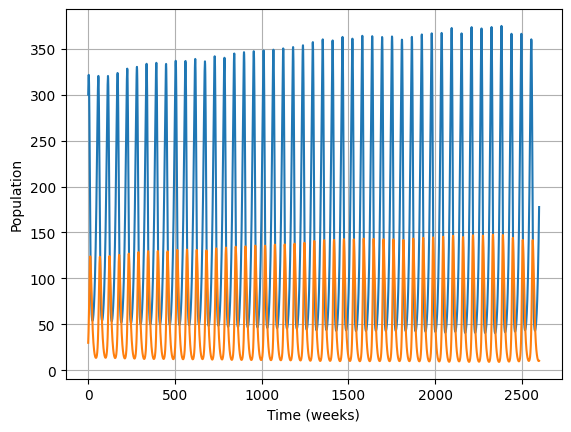

In [2]:
# First eq
def fun(t, state, a, b, c, sig): # Changed x and y to state
  x, y = state
  dxdt = a*x - b*x*y
  dydt = -c*y + sig*x*y
  return [dxdt, dydt]


y0 = [300, 30] # Deer population
t_span = [0, 2600] # Time span of 50 years
a = 0.1 # Birthrate of deer
b = 0.002 # Wolves’ effect on deer death rate
c = 0.15 # Wolves' death rate
sig = 0.001 # The effect of deer of wolf population growth rate is

args = (a, b, c, sig)

# Deer population
result = solve_ivp(fun, t_span, y0, args = args, t_eval = np.arange(0, 2600, 1))  # fun: function, t_span: time interval, y0: initial state
t_values = result.t
x_values_prey = result.y[0]
y_values_pred = result.y[1]

plt.plot(t_values, x_values_prey)
plt.plot(t_values, y_values_pred)
plt.xlabel('Time (weeks)')
plt.ylabel('Population')
plt.grid(True)

Plot a phase diagram in which the deer population (x-axis) is plotted agianst the wolf population (y-axis) over 50 years.

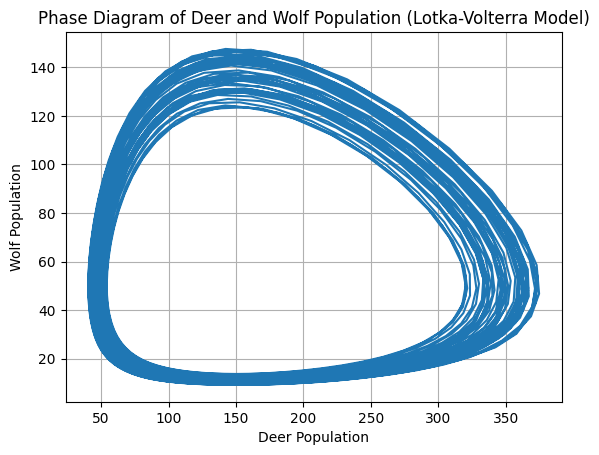

In [3]:
# Plot the phase diagram
plt.plot(x_values_prey, y_values_pred)
plt.title("Phase Diagram of Deer and Wolf Population (Lotka-Volterra Model)")
plt.xlabel("Deer Population")
plt.ylabel("Wolf Population")
plt.grid(True)

What is the maximium and minimium number of deer and wolves in the 50 year timespan?

In [4]:
# Find the maximum and minimum values for deer and wolves in the 50-year timespan
max_deer = np.max(x_values_prey)
min_deer = np.min(x_values_prey)

max_wolves = np.max(y_values_pred)
min_wolves = np.min(y_values_pred)

(max_deer, min_deer, max_wolves, min_wolves)


(374.69571439142516, 40.452089584026986, 147.5933764861943, 9.17785430976698)

The pattern obtained should be cyclical. Approximately how long does it take for the deer population population to go from its minimium to its maximium number within one cycle?

In [5]:
# Time points for min and max deer population
time_min_deer = t_values[np.argmin(x_values_prey)]
time_max_deer = t_values[np.argmax(x_values_prey)]

# Time diff
time_difference = time_max_deer - time_min_deer

print('The time difference is: ', time_difference,'weeks')


The time difference is:  36 weeks


Write a function titled euler that implements Euler’s method from the
previous slides.


In [6]:
y_values = []
x_values = []
t_values = []

def euler(fun, initial_conditions, h, t_end):
    x0, y0, t0 = initial_conditions

    # Compute the first values using the initial conditions
    y1 = y0 + fun(t0, (x0, y0), 0.1, 0.002, 0.15, 0.001)[1] * h
    x1 = x0 + fun(t0, (x0, y0), 0.1, 0.002, 0.15, 0.001)[0] * h

    # Append initial values
    y_values.append(y1)
    x_values.append(x1)
    t_values.append(t0 + h)

    # Iterate over the range of time steps
    for i in range(1, int((t_end - t0) / h)):
        # Update y and x based on previous values and the differential equations
        y_new = y_values[i - 1] + fun(i, (x_values[i - 1], y_values[i - 1]), 0.1, 0.002, 0.15, 0.001)[1] * h
        x_new = x_values[i - 1] + fun(i, (x_values[i - 1], y_values[i - 1]), 0.1, 0.002, 0.15, 0.001)[0] * h

        # Append the new values
        y_values.append(y_new)
        x_values.append(x_new)
        t_values.append(t_values[i - 1] + h)

    return t_values, x_values, y_values

Run your Euler’s function on the deer-wolf model introduced earlier.


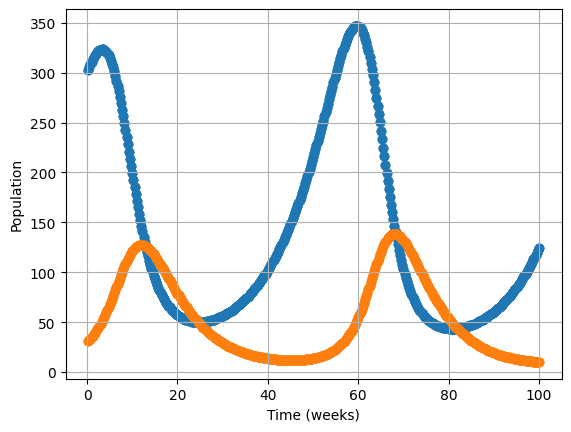

In [7]:
# Conditions
initial_conditions = (300,30,0)
h=0.25
t_end = 100

# Data
t_values_e = euler(fun, initial_conditions, h, t_end)[0]
pred_values_e = euler(fun, initial_conditions, h, t_end)[1]
prey_values_e = euler(fun, initial_conditions, h, t_end)[2]


# Plot of Eulers approximation of predator prey dynamics
plt.scatter(t_values_e, pred_values_e)
plt.scatter(t_values_e, prey_values_e)
plt.xlabel('Time (weeks)')
plt.ylabel('Population')
plt.grid(True)

Compare the results of Euler’s method against SciPy’s solver by plotting the
deer and wolf populations from each method over the *timespan*

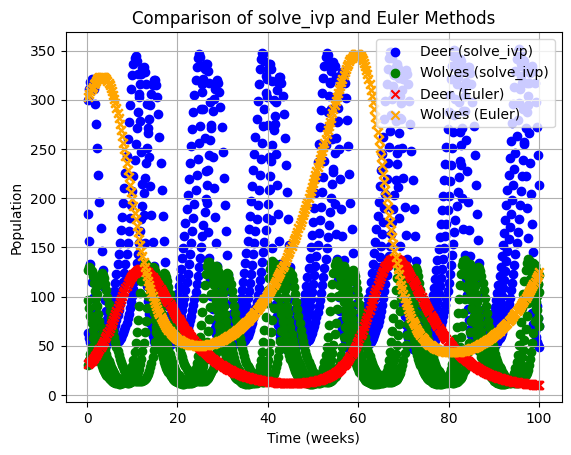

In [8]:
# Determine the minimum length to match arrays
min_length = min(len(t_values), len(t_values_e))

#  Cut the longer arrays to match the shorter ones
t_values_trimmed = t_values[:min_length]
x_values_prey_trimmed = x_values_prey[:min_length]
y_values_pred_trimmed = y_values_pred[:min_length]

t_values_e_trimmed = t_values_e[:min_length]
prey_values_e_trimmed = prey_values_e[:min_length]
pred_values_e_trimmed = pred_values_e[:min_length]

# Plot the comparison
plt.scatter(t_values_trimmed, x_values_prey_trimmed, label='Deer (solve_ivp)', color='blue')
plt.scatter(t_values_trimmed, y_values_pred_trimmed, label='Wolves (solve_ivp)', color='green')
plt.scatter(t_values_e_trimmed, prey_values_e_trimmed, label='Deer (Euler)', marker='x', color='red')
plt.scatter(t_values_e_trimmed, pred_values_e_trimmed, label='Wolves (Euler)', marker='x', color='orange')

# Add labels and legend
plt.xlabel('Time (weeks)')
plt.ylabel('Population')
plt.title('Comparison of solve_ivp and Euler Methods')
plt.legend()
plt.grid(True)
plt.show()


Write a Python function laplacian to implement the discretized Laplacian
operator in two dimensions using periodic boundary conditions.

In [9]:
def laplacian(u, k):

    return (np.roll(u, 1, axis=0) + np.roll(u, -1, axis=0) + np.roll(u, 1, axis=1) + np.roll(u, -1, axis=1) - 4*u) / (k**2)



*implement* the finite-difference scheme for the diffusion equation.

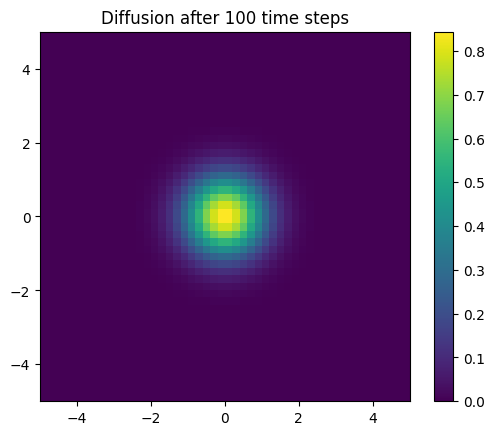

In [10]:
def diffusion_step(u, D, k, dt):
    # Compute the Laplacian of u
    lap = laplacian(u, k)

    # Update the solution using the finite-difference scheme
    u_new = u + D * dt * lap

    return u_new

# Parameters
m_x, m_y = 50, 50  # Grid size
D = 0.1            # Diffusion coefficient
k = 1.0            # Spatial step size
dt = 0.1           # Time step size
n_steps = 100      # Number of time steps

# Initial condition (a Gaussian distribution)
x = np.linspace(-5, 5, m_x)
y = np.linspace(-5, 5, m_y)
X, Y = np.meshgrid(x, y)
u = np.exp(-(X**2 + Y**2))

# Time evolution
for n in range(n_steps):
    u = diffusion_step(u, D, k, dt)

# Plot the result
plt.imshow(u, extent=[-5, 5, -5, 5], origin='lower')
plt.colorbar()
plt.title(f'Diffusion after {n_steps} time steps')
plt.show()


Solve the equation with periodic boundary conditions for a box size [0:2] x [0:1] until the time value of 0.25 with kappa = 1, k=0.125, h=k^2/4 and initial conditions u_0(x,y) = 1 + cos(pi*x) * y(1-y). You should obtain a m_x X m_y X n matrix (dimensions corresponding to x-axis, y-axis, and time).

In [11]:
# Parameters
k = 0.125        # Spatial step size
kappa = 1.0      # Diffusion coefficient
h = k**2 / 4     # Time step size
t_end = 0.25     # Final time
m_x = int(2 / k) + 1  # Number of grid points along x-axis
m_y = int(1 / k) + 1  # Number of grid points along y-axis
n_steps = int(t_end / h)  # Number of time steps

# Grid
x = np.linspace(0, 2, m_x)
y = np.linspace(0, 1, m_y)
X, Y = np.meshgrid(x, y)

# Initial condition
u = 1 + np.cos(np.pi * X) * Y * (1 - Y)

# 3D matrix to store the results (x, y, time)
u_matrix = np.zeros((m_y, m_x, n_steps + 1))
u_matrix[:, :, 0] = u  # Store initial condition


# Time evolution
for n in range(1, n_steps + 1):
    lap = laplacian(u, k)  # Compute the Laplacian
    u = u + kappa * h * lap  # Update u using the diffusion equation
    u_matrix[:, :, n] = u  # Store the result at time step n



Plot the diffusion using the function contourf start (initial condition), after 10 and 30 time steps, and at the end (final state)

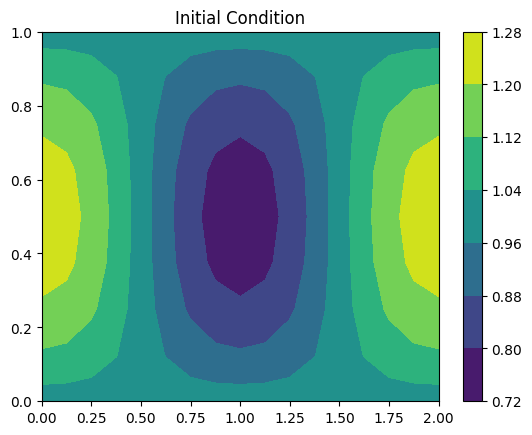

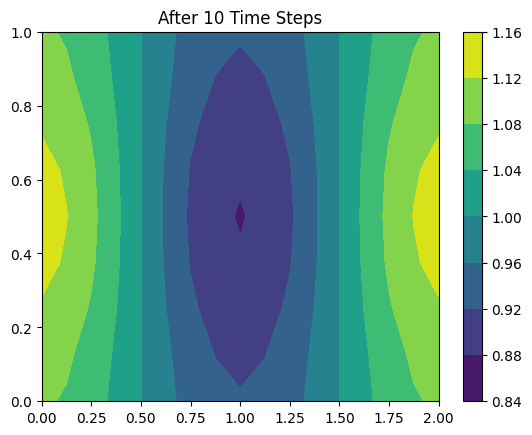

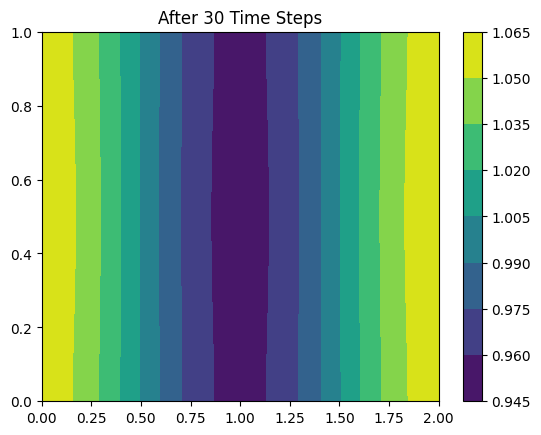

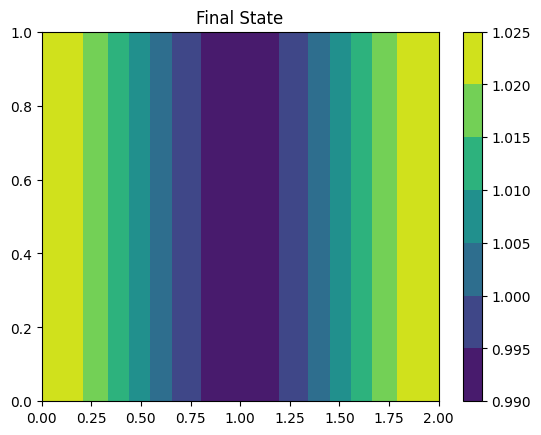

In [12]:
# Plot the initial condition
plt.contourf(X, Y, u_matrix[:, :, 0])
plt.title('Initial Condition')
plt.colorbar()
plt.show()

# Plot after 10 time steps
plt.contourf(X, Y, u_matrix[:, :, 10])
plt.title('After 10 Time Steps')
plt.colorbar()
plt.show()

# Plot after 30 time steps
plt.contourf(X, Y, u_matrix[:, :, 30])
plt.title('After 30 Time Steps')
plt.colorbar()
plt.show()

# Plot the final state
plt.contourf(X, Y, u_matrix[:, :, -1])
plt.title('Final State')
plt.colorbar()
plt.show()
